In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

In [6]:
# import data

db = pymysql.connect(
        host='127.0.0.1', 
        port=3306, 
        user='root', 
        passwd='gkqehk12', 
        db='ethereum_data', 
        charset='utf8',
        autocommit=True,
        cursorclass=pymysql.cursors.DictCursor
    )
cursor = db.cursor() 

def get_pricedata(cursor):
    sql = """
        SELECT 
            date(date_format(STR_TO_DATE(price_date, '%m/%d/%Y'), '%Y-%m-%d')) as price_date,
            close_price as price
        FROM price_data
        where date(date_format(STR_TO_DATE(price_date, '%m/%d/%Y'), '%Y-%m-%d'))
            between date('2020-01-01') and date('2020-03-31')
    """
    cursor.execute(sql)
    result = cursor.fetchall()
    # pricedata = result.to_dataframe
    pricedata = pd.DataFrame(result)
    return pricedata

def get_blockdata(cursor):
    sql = """
        SELECT 
            timestamp,
            date(timestamp) as block_date,
            number,
            hash,
            miner,
            difficulty,
            total_difficulty,
            size,
            gas_limit,
            gas_used,
            transaction_count
        FROM block_data
        where date(timestamp)
            between date('2020-01-01') and date('2020-03-31')
    """
    cursor.execute(sql)
    result = cursor.fetchall()
    # blockdata = result.to_dataframe
    blockdata = pd.DataFrame(result)
    return blockdata

def get_transactiondata(cursor):
    sql = """
        SELECT 
            *
        FROM mart_transaction
        where date(block_date)
            between date('2020-01-01') and date('2021-03-31')
    """
    cursor.execute(sql)
    result = cursor.fetchall()
    # transactiondata = result.to_dataframe
    transactiondata = pd.DataFrame(result)
    return transactiondata

blockdata = get_blockdata(cursor)
transactiondata = get_transactiondata(cursor)
pricedata = get_pricedata(cursor)

            timestamp  block_date   number  \
0 2020-03-10 21:21:18  2020-03-10  9646114   
1 2020-03-10 17:09:35  2020-03-10  9644970   
2 2020-03-10 14:40:03  2020-03-10  9644308   
3 2020-03-10 10:38:07  2020-03-10  9643267   
4 2020-03-10 13:48:31  2020-03-10  9644090   

                                                hash  \
0  0xcaa6728e084b8f671572dc6e6d4c2f7e891ca70e0e9c...   
1  0x94a82ec63c2fa24d2fa6f7f9b08b60aa44c835cad6f2...   
2  0xd50fec027673f5888f351048147d7aff8b0d71024247...   
3  0x8f1dd356a490b1c9dc6ae1025adf56a73bd8804585bc...   
4  0xf4fdf6d87f0083d596b9c8b8eb9420990f4de9e1d0fd...   

                                        miner                  difficulty  \
0  0xea674fdde714fd979de3edf0f56aa9716b898ec8  2255841699783819.000000000   
1  0xea674fdde714fd979de3edf0f56aa9716b898ec8  2232343238010893.000000000   
2  0x829bd824b016326a401d083b33d092293333a830  2265684313261644.000000000   
3  0x04668ec2f57cc15c381b461b9fedab5d451c8f7f  2339309348717565.000000000   
4

In [7]:
# check data

def checkdata(*args):
    for i in args:
        # return i.head()
        print(i.head())

checkdata(blockdata, transactiondata, pricedata)

            timestamp  block_date   number  \
0 2020-03-10 21:21:18  2020-03-10  9646114   
1 2020-03-10 17:09:35  2020-03-10  9644970   
2 2020-03-10 14:40:03  2020-03-10  9644308   
3 2020-03-10 10:38:07  2020-03-10  9643267   
4 2020-03-10 13:48:31  2020-03-10  9644090   

                                                hash  \
0  0xcaa6728e084b8f671572dc6e6d4c2f7e891ca70e0e9c...   
1  0x94a82ec63c2fa24d2fa6f7f9b08b60aa44c835cad6f2...   
2  0xd50fec027673f5888f351048147d7aff8b0d71024247...   
3  0x8f1dd356a490b1c9dc6ae1025adf56a73bd8804585bc...   
4  0xf4fdf6d87f0083d596b9c8b8eb9420990f4de9e1d0fd...   

                                        miner                  difficulty  \
0  0xea674fdde714fd979de3edf0f56aa9716b898ec8  2255841699783819.000000000   
1  0xea674fdde714fd979de3edf0f56aa9716b898ec8  2232343238010893.000000000   
2  0x829bd824b016326a401d083b33d092293333a830  2265684313261644.000000000   
3  0x04668ec2f57cc15c381b461b9fedab5d451c8f7f  2339309348717565.000000000   
4

In [5]:
# Join and check data
def join_data(data1, data2, data3): 
    first_join = pd.merge(data1, data2, left_on='number', right_on='block_number', how='outer')
    final_join = pd.merge(first_join, data3, left_on='number', right_on='block_number', how='outer')
    return final_join
    # ref - http://www.gisdeveloper.co.kr/?p=8255

joinned_data = join_data(blockdata, transactiondata, tokentransdata)

# Drop unnecessary columns
joinned_data = joinned_data.drop(['nonce_x', 'sha3_uncles', 'logs_bloom', 'transactions_root', 'state_root', 'receipts_root', 'max_fee_per_gas', 'max_priority_fee_per_gas'], axis=1)
# ref - https://stml.tistory.com/26

def check_join(data):
    return data.loc[(data['number'] == 7000200), ['number', 'gas', 'gas_price']]
    # https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values

# check_data = check_join(joinned_data)
# print(check_join(joinned_data))

# def fe_joinned_data(data):
#     data['block_timestamp'] = pd.to_datetime(data['block_timestamp'], unit='s')
#     data['block_timestamp'] = data['block_timestamp'].dt.floor('h')
#     price_join = pd.merge(data, pricedata, left_on='block_timestamp', right_on='Date', how='outer')
#     return price_join

# price_join = fe_joinned_data(joinned_data)

<ipython-input-6-b642624d937d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_address['block_timestamp'] = pd.to_datetime(active_address['block_timestamp'], unit='s')
<ipython-input-6-b642624d937d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_address['block_timestamp'] = active_address['block_timestamp'].dt.floor('h')
<ipython-input-6-b642624d937d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

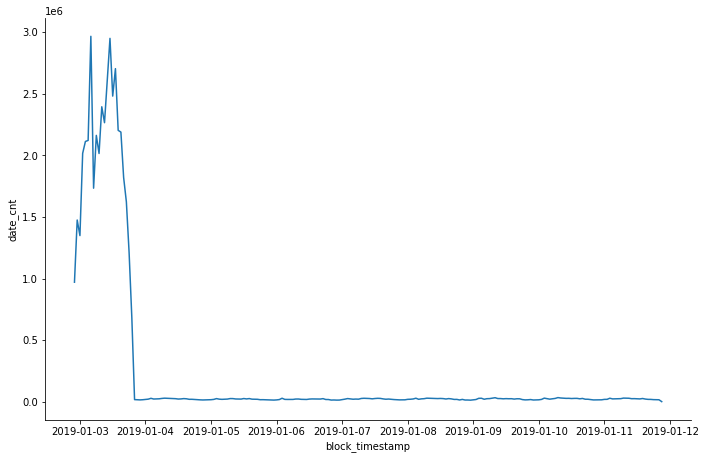

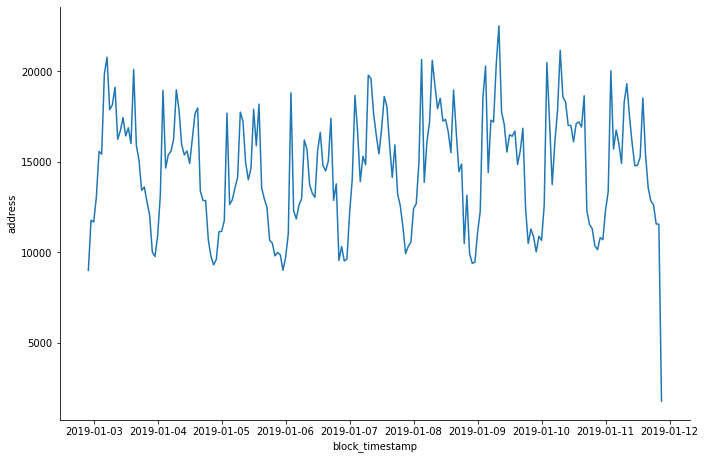

In [6]:

# Explore data - active address

# Check active address
def fe_active_address_blocknum(data):
    active_address = data[['number', 'from_address_x', 'to_address_x', 'block_timestamp']]
    active_address['block_timestamp'] = pd.to_datetime(active_address['block_timestamp'], unit='s') 
    # ref - https://stackoverflow.com/questions/34883101/pandas-converting-row-with-unix-timestamp-in-milliseconds-to-datetime
    # active_address['block_timestamp'] = pd.to_datetime(active_address['block_timestamp'], unit='D').dt.date
    active_address['block_timestamp'] = active_address['block_timestamp'].dt.floor('h')
    # ref - https://stackoverflow.com/questions/51600355/truncate-datetime-object-pandas
    active_address['date_cnt'] = active_address.groupby(['block_timestamp'])['block_timestamp'].transform('count')
    # ref - https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221607911428
    return active_address

def plot_blocknum_by_time(data):
    visualize_date = data.drop(['number', 'from_address_x', 'to_address_x'], axis=1)
    visualize_date = visualize_date.groupby(['block_timestamp'], as_index=False).count() # Count를 할 다른 Column이 있어야 오류 없이 작동 여기서는 모든 row에 부여된 'date_cnt' 이용
    # visualize_date['date_cnt2'] = active_address.groupby(['block_timestamp'])['block_timestamp'].transform('count')
    date_plot = sns.relplot(x='block_timestamp', y='date_cnt', kind='line', height=6.27, aspect=9.7/6.27, data=visualize_date)
    # print(visualize_date)
    return date_plot

def plot_active_address_by_time(data):
    data = data.drop(['number', 'date_cnt'], axis=1)
    data = pd.melt(data, id_vars=['block_timestamp'], var_name='from_or_to', value_name='address')
    data.loc[(data['from_or_to'] == 'from_address_x') | (data['from_or_to'] == 'to_address_x'), 'from_or_to'] = 1
    # ref - https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/
    grouped_data = data.groupby(['block_timestamp'], as_index=False).address.nunique()
    # ref - https://stackoverflow.com/questions/15411158/pandas-countdistinct-equivalent
    # print(grouped_data.head(-5))
    actad_plot = sns.relplot(x='block_timestamp', y='address', kind='line', height=6.27, aspect=9.7/6.27, data=grouped_data)
    return actad_plot

base_data = fe_active_address_blocknum(joinned_data)
plot_blocknum_by_time(base_data)
plot_active_address_by_time(base_data)




<ipython-input-7-b13e129b10fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe_data['block_timestamp'] = pd.to_datetime(fe_data['block_timestamp'], unit='s')
<ipython-input-7-b13e129b10fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe_data['block_timestamp'] = fe_data['block_timestamp'].dt.floor('h')


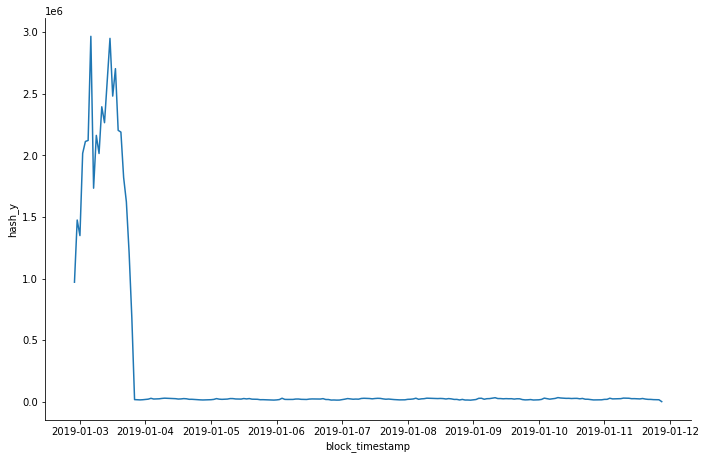

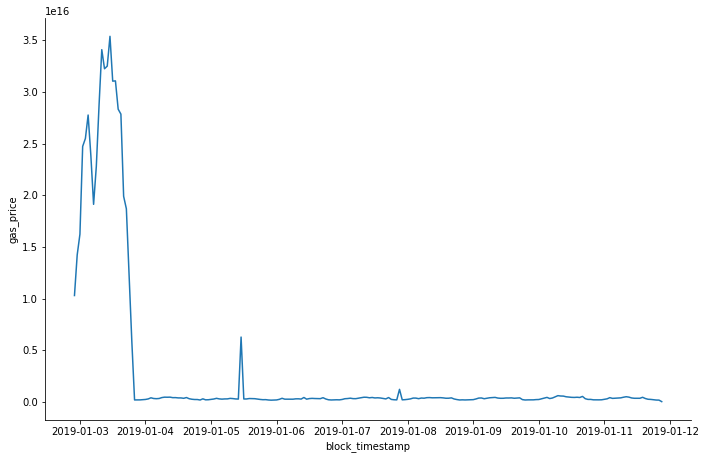

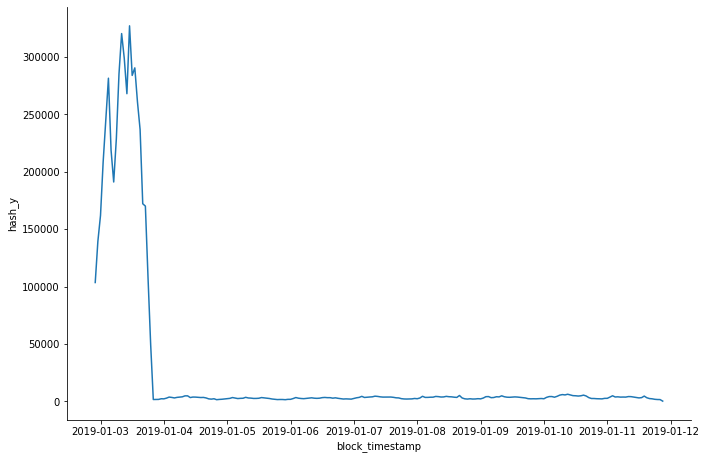

In [7]:
# Exploring transaction

def fe_transaction_number(data):
    fe_data = data[['number', 'hash_y', 'from_address_x', 'to_address_x', 'gas', 'gas_price', 'gas_limit', 'block_timestamp']]
    fe_data['block_timestamp'] = pd.to_datetime(fe_data['block_timestamp'], unit='s') 
    fe_data['block_timestamp'] = fe_data['block_timestamp'].dt.floor('h')
    return fe_data
    
def plot_transaction_counts(data):
    data = data.drop(['number', 'from_address_x', 'to_address_x', 'gas', 'gas_price', 'gas_limit'], axis=1)
    grouped_data = data.groupby(['block_timestamp'], as_index=False).count()
    trx_cnt_plot = sns.relplot(x='block_timestamp', y='hash_y', kind='line', height=6.27, aspect=9.7/6.27, data=grouped_data)
    return trx_cnt_plot

def plot_gas_used(data):
    data = data.drop(['number', 'hash_y', 'from_address_x', 'to_address_x'], axis=1)
    grouped_data = data.groupby(['block_timestamp'], as_index=False).sum()
    gas_used_plot = sns.relplot(x='block_timestamp', y='gas_price', kind='line', height=6.27, aspect=9.7/6.27, data=grouped_data)
    return gas_used_plot

def plot_transactions_with_worthy_gas(data):
    data = data.drop(['number', 'from_address_x', 'to_address_x', 'gas', 'gas_limit'], axis=1)
    data.drop(data[data['gas_price'] < 25000000000].index, inplace = True)
    grouped_data = data.groupby(['block_timestamp'], as_index=False).count()
    trx_w_worthy_gas_plot = sns.relplot(x='block_timestamp', y='hash_y', kind='line', height=6.27, aspect=9.7/6.27, data=grouped_data)
    return trx_w_worthy_gas_plot
    # if data.loc[data['gas_price'] >= 25000000000, 'gas_price']:
    #     data['gas_price']

base_data = fe_transaction_number(joinned_data)
plot_transaction_counts(base_data)
plot_gas_used(base_data)
plot_transactions_with_worthy_gas(base_data)
    

<ipython-input-8-84c7a7d8a40b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe_data['block_timestamp'] = pd.to_datetime(fe_data['block_timestamp'], unit='s')
<ipython-input-8-84c7a7d8a40b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe_data['block_timestamp'] = fe_data['block_timestamp'].dt.floor('h')


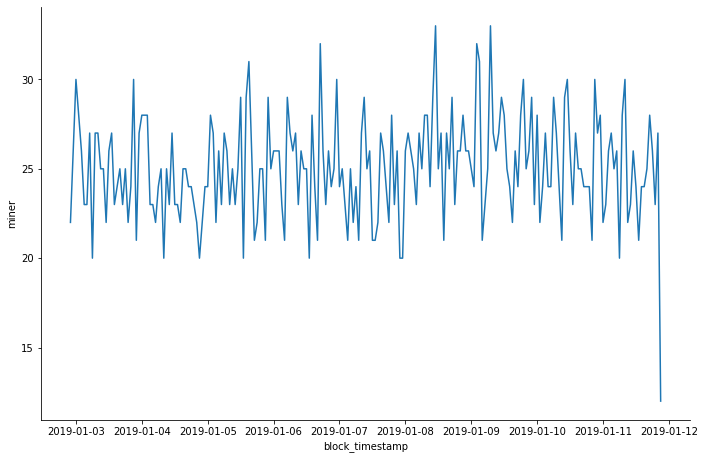

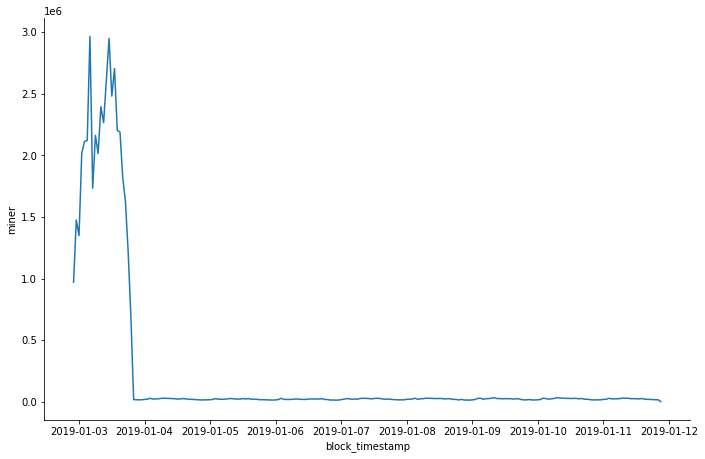

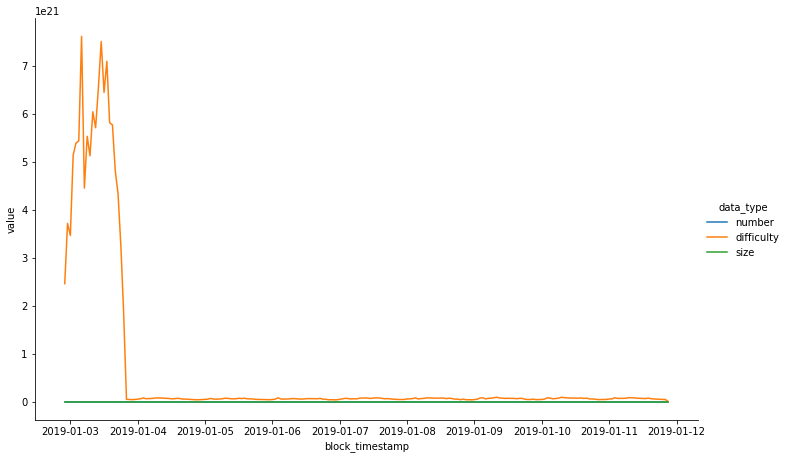

In [8]:
# Exploring miners

def fe_miner_data(data):
    fe_data = data[['number', 'hash_x', 'miner', 'difficulty', 'total_difficulty', 'size', 'extra_data', 'block_timestamp']]
    fe_data['block_timestamp'] = pd.to_datetime(fe_data['block_timestamp'], unit='s') 
    fe_data['block_timestamp'] = fe_data['block_timestamp'].dt.floor('h')
    return fe_data

def plot_distinct_miner(data):
    data = data.drop(['hash_x', 'difficulty', 'total_difficulty', 'size', 'extra_data'], axis=1)
    grouped_data = data.groupby(['block_timestamp'], as_index=False).miner.nunique()
    distinct_miner_plot = sns.relplot(x='block_timestamp', y='miner', kind='line', height=6.27, aspect=9.7/6.27, data=grouped_data)
    return distinct_miner_plot

def plot_miner(data):
    data = data.drop(['hash_x', 'difficulty', 'total_difficulty', 'size', 'extra_data'], axis=1)
    grouped_data = data.groupby(['block_timestamp'], as_index=False).count()
    distinct_miner_plot = sns.relplot(x='block_timestamp', y='miner', kind='line', height=6.27, aspect=9.7/6.27, data=grouped_data)
    return distinct_miner_plot

def plot_difficulty(data):
    data = data.drop(['hash_x', 'miner', 'extra_data'], axis=1)
    grouped_data = data.groupby(['block_timestamp'], as_index=False).sum()
    grouped_data = pd.melt(grouped_data, id_vars=['block_timestamp'], var_name='data_type', value_name='value')
    difficulty_size_plot = sns.relplot(x='block_timestamp', y='value', kind='line', hue='data_type', height=6.27, aspect=9.7/6.27, data=grouped_data)
    return difficulty_size_plot
    # print(grouped_data.head())

base_data = fe_miner_data(joinned_data)
plot_distinct_miner(base_data)
plot_miner(base_data)
plot_difficulty(base_data)

          Date    Open
867 2019-08-16  184.09
868 2019-08-15  187.76
869 2019-08-14  206.88
870 2019-08-13  209.28
871 2019-08-11  206.43


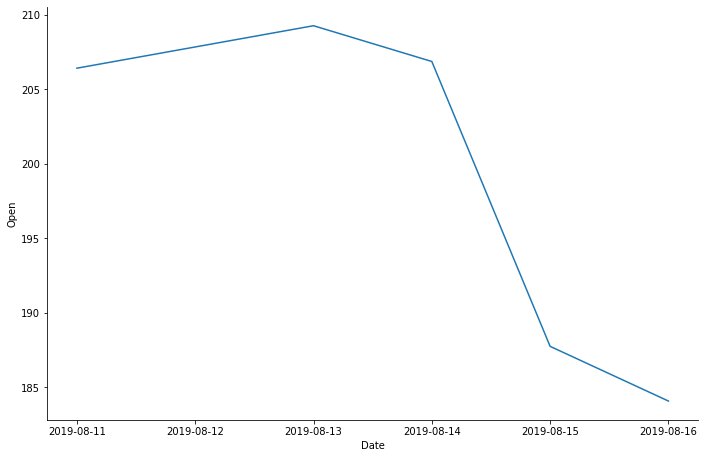

In [9]:
# Ethereum price plotting
import datetime as dt

def plot_eth_price(data):
    data = data[['Date', 'Open']]
    cut_data = data.loc[(data['Date'] >= '2019-08-11') & (data['Date'] <= '2019-08-30')] # Error Reference - https://ellun.tistory.com/320
    eth_price_plot = sns.relplot(x='Date', y='Open', kind='line', height=6.27, aspect=9.7/6.27, data=cut_data)
    print(cut_data.head())
    return eth_price_plot

plot_eth_price(pricedata)



                     number  difficulty      size  transaction_count  \
number             1.000000    0.527428  0.007700           0.004983   
difficulty         0.527428    1.000000 -0.065826          -0.060240   
size               0.007700   -0.065826  1.000000           0.929730   
transaction_count  0.004983   -0.060240  0.929730           1.000000   
gas_price         -0.300068   -0.254406  0.184991           0.187138   
from_address_x     0.005822   -0.050703  0.849618           0.858969   
to_address_x       0.005977   -0.043572  0.844056           0.915583   

                   gas_price  from_address_x  to_address_x  
number             -0.300068        0.005822      0.005977  
difficulty         -0.254406       -0.050703     -0.043572  
size                0.184991        0.849618      0.844056  
transaction_count   0.187138        0.858969      0.915583  
gas_price           1.000000        0.175974      0.142762  
from_address_x      0.175974        1.000000      0.70328

<AxesSubplot:>

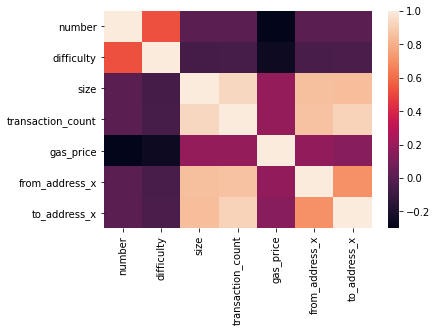

In [10]:
# Pearson correlation test

def pearson_corr(data):
    data = data[['number', 'difficulty', 'total_difficulty', 'size', 'transaction_count', 'gas_price', 'from_address_x', 'to_address_x']]
    grouped_data = data.groupby(['number', 'difficulty', 'total_difficulty', 'size', 'transaction_count'], as_index=False).agg({'gas_price':'sum', 'from_address_x': 'nunique', 'to_address_x': 'nunique'})
    # ref - https://stackoverflow.com/questions/38174155/group-dataframe-and-get-sum-and-count
    corr = grouped_data.corr(method='pearson')
    print(corr)
    corr_heatmap = sns.heatmap(corr)
    return corr_heatmap

pearson_corr(joinned_data)